In [43]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.style.use('classic')
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.preprocessing import image
import os
import cv2 
from PIL import Image
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
import pandas as pd
import seaborn as sn
from keras.utils import normalize
from sklearn.model_selection import train_test_split
import numpy as np
import glob
from matplotlib import pyplot as plt
from skimage.morphology import extrema
from skimage.morphology import watershed as skwater
import win32ui
import win32con
import keras
from math import log10, sqrt 
import cv2 
import numpy as np
from math import log10, sqrt 
import cv2 
import numpy as np
import numpy as np
import random
import cv2
from skimage.filters import median
import glob
from skimage.morphology import disk

In [ ]:
                                         #--------Rename-----------

In [3]:
path= os.chdir("G:\\my dataset\\Benign")

In [6]:
i=0
for file in os.listdir(path):
    newname = "Be{}.jpg".format(i)
    os.rename(file, newname)
    i=i+1

In [7]:
path= os.chdir("G:\\my dataset\\Malignant")

In [10]:
j=0
for f in os.listdir(path):
    newname = "Ma{}.jpg".format(j)
    os.rename(f, newname)
    j=j+1

In [ ]:
                                      #----------------Resize-------------

In [20]:
source= "G:/my dataset/Benign/*.jpg"

In [21]:
image_number= 1

for file in glob.glob(source):
    image= cv2.imread(file, 0)
    rsize = (300, 300)
    # resize image
    output = cv2.resize(image, rsize)
    cv2.imwrite("G:/my dataset resizing/Ben-resized/" + str(image_number) +".jpg", output)
    #cv2.imwrite('C:/Users/Click/Desktop/no.jpg',output)
    image_number +=1

In [25]:
source2 = "G:/my dataset/Malignant/*.jpg"

In [26]:
image_number= 1

for file in glob.glob(source2):
    image= cv2.imread(file, 0)
    rsize = (300, 300)
    # resize image
    output = cv2.resize(image, rsize)
    cv2.imwrite("G:/my dataset resizing/Ma-resized/" + str(image_number) +".jpg", output)
    #cv2.imwrite('C:/Users/Click/Desktop/no.jpg',output)
    image_number +=1

In [ ]:
                                            #-----------------Pre-processing------------

In [30]:
path = "F:/for median filter and salt and pepper/Ben-resized/*.jpg"

In [31]:
def sp_noise(image,prob):
    '''
    Add salt and pepper noise to image
    prob: Probability of the noise
    '''
    output = np.zeros(image.shape,np.uint8)
    thres = 1 - prob 
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            rdn = random.random()
            if rdn < prob:
                output[i][j] = 0
            elif rdn > thres:
                output[i][j] = 255
            else:
                output[i][j] = image[i][j]
    return output
image_number= 1
for file in glob.glob(path):
    print(file)
    image= cv2.imread(file, 0)
    noise_img = sp_noise(image,0.05)
    cv2.imwrite("F:/for median filter and salt and pepper/Preprocessing/addnoise/ben/" + str(image_number) +".jpg", noise_img)
    image_number +=1

F:/for median filter and salt and pepper/Ben-resized\1.jpg
F:/for median filter and salt and pepper/Ben-resized\10.jpg
F:/for median filter and salt and pepper/Ben-resized\100.jpg
F:/for median filter and salt and pepper/Ben-resized\101.jpg
F:/for median filter and salt and pepper/Ben-resized\102.jpg
F:/for median filter and salt and pepper/Ben-resized\103.jpg
F:/for median filter and salt and pepper/Ben-resized\104.jpg
F:/for median filter and salt and pepper/Ben-resized\105.jpg
F:/for median filter and salt and pepper/Ben-resized\106.jpg
F:/for median filter and salt and pepper/Ben-resized\107.jpg
F:/for median filter and salt and pepper/Ben-resized\108.jpg
F:/for median filter and salt and pepper/Ben-resized\109.jpg
F:/for median filter and salt and pepper/Ben-resized\11.jpg
F:/for median filter and salt and pepper/Ben-resized\110.jpg
F:/for median filter and salt and pepper/Ben-resized\111.jpg
F:/for median filter and salt and pepper/Ben-resized\112.jpg
F:/for median filter and sal

F:/for median filter and salt and pepper/Ben-resized\221.jpg
F:/for median filter and salt and pepper/Ben-resized\222.jpg
F:/for median filter and salt and pepper/Ben-resized\223.jpg
F:/for median filter and salt and pepper/Ben-resized\224.jpg
F:/for median filter and salt and pepper/Ben-resized\225.jpg
F:/for median filter and salt and pepper/Ben-resized\226.jpg
F:/for median filter and salt and pepper/Ben-resized\227.jpg
F:/for median filter and salt and pepper/Ben-resized\228.jpg
F:/for median filter and salt and pepper/Ben-resized\229.jpg
F:/for median filter and salt and pepper/Ben-resized\23.jpg
F:/for median filter and salt and pepper/Ben-resized\230.jpg
F:/for median filter and salt and pepper/Ben-resized\231.jpg
F:/for median filter and salt and pepper/Ben-resized\232.jpg
F:/for median filter and salt and pepper/Ben-resized\233.jpg
F:/for median filter and salt and pepper/Ben-resized\234.jpg
F:/for median filter and salt and pepper/Ben-resized\235.jpg
F:/for median filter and 

F:/for median filter and salt and pepper/Ben-resized\343.jpg
F:/for median filter and salt and pepper/Ben-resized\344.jpg
F:/for median filter and salt and pepper/Ben-resized\345.jpg
F:/for median filter and salt and pepper/Ben-resized\346.jpg
F:/for median filter and salt and pepper/Ben-resized\347.jpg
F:/for median filter and salt and pepper/Ben-resized\348.jpg
F:/for median filter and salt and pepper/Ben-resized\349.jpg
F:/for median filter and salt and pepper/Ben-resized\35.jpg
F:/for median filter and salt and pepper/Ben-resized\350.jpg
F:/for median filter and salt and pepper/Ben-resized\351.jpg
F:/for median filter and salt and pepper/Ben-resized\352.jpg
F:/for median filter and salt and pepper/Ben-resized\353.jpg
F:/for median filter and salt and pepper/Ben-resized\354.jpg
F:/for median filter and salt and pepper/Ben-resized\355.jpg
F:/for median filter and salt and pepper/Ben-resized\356.jpg
F:/for median filter and salt and pepper/Ben-resized\357.jpg
F:/for median filter and 

F:/for median filter and salt and pepper/Ben-resized\466.jpg
F:/for median filter and salt and pepper/Ben-resized\467.jpg
F:/for median filter and salt and pepper/Ben-resized\468.jpg
F:/for median filter and salt and pepper/Ben-resized\469.jpg
F:/for median filter and salt and pepper/Ben-resized\47.jpg
F:/for median filter and salt and pepper/Ben-resized\470.jpg
F:/for median filter and salt and pepper/Ben-resized\471.jpg
F:/for median filter and salt and pepper/Ben-resized\472.jpg
F:/for median filter and salt and pepper/Ben-resized\473.jpg
F:/for median filter and salt and pepper/Ben-resized\474.jpg
F:/for median filter and salt and pepper/Ben-resized\475.jpg
F:/for median filter and salt and pepper/Ben-resized\476.jpg
F:/for median filter and salt and pepper/Ben-resized\477.jpg
F:/for median filter and salt and pepper/Ben-resized\478.jpg
F:/for median filter and salt and pepper/Ben-resized\479.jpg
F:/for median filter and salt and pepper/Ben-resized\48.jpg
F:/for median filter and s

F:/for median filter and salt and pepper/Ben-resized\589.jpg
F:/for median filter and salt and pepper/Ben-resized\59.jpg
F:/for median filter and salt and pepper/Ben-resized\590.jpg
F:/for median filter and salt and pepper/Ben-resized\591.jpg
F:/for median filter and salt and pepper/Ben-resized\592.jpg
F:/for median filter and salt and pepper/Ben-resized\593.jpg
F:/for median filter and salt and pepper/Ben-resized\594.jpg
F:/for median filter and salt and pepper/Ben-resized\595.jpg
F:/for median filter and salt and pepper/Ben-resized\596.jpg
F:/for median filter and salt and pepper/Ben-resized\597.jpg
F:/for median filter and salt and pepper/Ben-resized\598.jpg
F:/for median filter and salt and pepper/Ben-resized\599.jpg
F:/for median filter and salt and pepper/Ben-resized\6.jpg
F:/for median filter and salt and pepper/Ben-resized\60.jpg
F:/for median filter and salt and pepper/Ben-resized\600.jpg
F:/for median filter and salt and pepper/Ben-resized\601.jpg
F:/for median filter and sal

F:/for median filter and salt and pepper/Ben-resized\71.jpg
F:/for median filter and salt and pepper/Ben-resized\710.jpg
F:/for median filter and salt and pepper/Ben-resized\711.jpg
F:/for median filter and salt and pepper/Ben-resized\712.jpg
F:/for median filter and salt and pepper/Ben-resized\713.jpg
F:/for median filter and salt and pepper/Ben-resized\714.jpg
F:/for median filter and salt and pepper/Ben-resized\715.jpg
F:/for median filter and salt and pepper/Ben-resized\716.jpg
F:/for median filter and salt and pepper/Ben-resized\717.jpg
F:/for median filter and salt and pepper/Ben-resized\718.jpg
F:/for median filter and salt and pepper/Ben-resized\719.jpg
F:/for median filter and salt and pepper/Ben-resized\72.jpg
F:/for median filter and salt and pepper/Ben-resized\720.jpg
F:/for median filter and salt and pepper/Ben-resized\721.jpg
F:/for median filter and salt and pepper/Ben-resized\722.jpg
F:/for median filter and salt and pepper/Ben-resized\723.jpg
F:/for median filter and s

F:/for median filter and salt and pepper/Ben-resized\831.jpg
F:/for median filter and salt and pepper/Ben-resized\832.jpg
F:/for median filter and salt and pepper/Ben-resized\833.jpg
F:/for median filter and salt and pepper/Ben-resized\834.jpg
F:/for median filter and salt and pepper/Ben-resized\835.jpg
F:/for median filter and salt and pepper/Ben-resized\836.jpg
F:/for median filter and salt and pepper/Ben-resized\837.jpg
F:/for median filter and salt and pepper/Ben-resized\838.jpg
F:/for median filter and salt and pepper/Ben-resized\839.jpg
F:/for median filter and salt and pepper/Ben-resized\84.jpg
F:/for median filter and salt and pepper/Ben-resized\840.jpg
F:/for median filter and salt and pepper/Ben-resized\841.jpg
F:/for median filter and salt and pepper/Ben-resized\842.jpg
F:/for median filter and salt and pepper/Ben-resized\843.jpg
F:/for median filter and salt and pepper/Ben-resized\844.jpg
F:/for median filter and salt and pepper/Ben-resized\845.jpg
F:/for median filter and 

In [36]:
path2 = "F:/for median filter and salt and pepper/Ma-resized/*.jpg"

In [37]:
def sp_noise(image,prob):
    '''
    Add salt and pepper noise to image
    prob: Probability of the noise
    '''
    output = np.zeros(image.shape,np.uint8)
    thres = 1 - prob 
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            rdn = random.random()
            if rdn < prob:
                output[i][j] = 0
            elif rdn > thres:
                output[i][j] = 255
            else:
                output[i][j] = image[i][j]
    return output
image_number= 1
for file in glob.glob(path2):
    print(file)
    image= cv2.imread(file, 0)
    noise_img = sp_noise(image,0.05)
    cv2.imwrite("F:/for median filter and salt and pepper/Preprocessing/addnoise/mal/" + str(image_number) +".jpg", noise_img)
    image_number +=1

F:/for median filter and salt and pepper/Ma-resized\1.jpg
F:/for median filter and salt and pepper/Ma-resized\10.jpg
F:/for median filter and salt and pepper/Ma-resized\100.jpg
F:/for median filter and salt and pepper/Ma-resized\1000.jpg
F:/for median filter and salt and pepper/Ma-resized\1001.jpg
F:/for median filter and salt and pepper/Ma-resized\1002.jpg
F:/for median filter and salt and pepper/Ma-resized\1003.jpg
F:/for median filter and salt and pepper/Ma-resized\1004.jpg
F:/for median filter and salt and pepper/Ma-resized\1005.jpg
F:/for median filter and salt and pepper/Ma-resized\1006.jpg
F:/for median filter and salt and pepper/Ma-resized\1007.jpg
F:/for median filter and salt and pepper/Ma-resized\1008.jpg
F:/for median filter and salt and pepper/Ma-resized\1009.jpg
F:/for median filter and salt and pepper/Ma-resized\101.jpg
F:/for median filter and salt and pepper/Ma-resized\1010.jpg
F:/for median filter and salt and pepper/Ma-resized\1011.jpg
F:/for median filter and salt a

F:/for median filter and salt and pepper/Ma-resized\112.jpg
F:/for median filter and salt and pepper/Ma-resized\1120.jpg
F:/for median filter and salt and pepper/Ma-resized\1121.jpg
F:/for median filter and salt and pepper/Ma-resized\1122.jpg
F:/for median filter and salt and pepper/Ma-resized\1123.jpg
F:/for median filter and salt and pepper/Ma-resized\1124.jpg
F:/for median filter and salt and pepper/Ma-resized\1125.jpg
F:/for median filter and salt and pepper/Ma-resized\1126.jpg
F:/for median filter and salt and pepper/Ma-resized\1127.jpg
F:/for median filter and salt and pepper/Ma-resized\1128.jpg
F:/for median filter and salt and pepper/Ma-resized\1129.jpg
F:/for median filter and salt and pepper/Ma-resized\113.jpg
F:/for median filter and salt and pepper/Ma-resized\1130.jpg
F:/for median filter and salt and pepper/Ma-resized\1131.jpg
F:/for median filter and salt and pepper/Ma-resized\1132.jpg
F:/for median filter and salt and pepper/Ma-resized\1133.jpg
F:/for median filter and s

F:/for median filter and salt and pepper/Ma-resized\1241.jpg
F:/for median filter and salt and pepper/Ma-resized\1242.jpg
F:/for median filter and salt and pepper/Ma-resized\1243.jpg
F:/for median filter and salt and pepper/Ma-resized\1244.jpg
F:/for median filter and salt and pepper/Ma-resized\1245.jpg
F:/for median filter and salt and pepper/Ma-resized\1246.jpg
F:/for median filter and salt and pepper/Ma-resized\1247.jpg
F:/for median filter and salt and pepper/Ma-resized\1248.jpg
F:/for median filter and salt and pepper/Ma-resized\1249.jpg
F:/for median filter and salt and pepper/Ma-resized\125.jpg
F:/for median filter and salt and pepper/Ma-resized\1250.jpg
F:/for median filter and salt and pepper/Ma-resized\1251.jpg
F:/for median filter and salt and pepper/Ma-resized\1252.jpg
F:/for median filter and salt and pepper/Ma-resized\1253.jpg
F:/for median filter and salt and pepper/Ma-resized\1254.jpg
F:/for median filter and salt and pepper/Ma-resized\1255.jpg
F:/for median filter and 

F:/for median filter and salt and pepper/Ma-resized\1364.jpg
F:/for median filter and salt and pepper/Ma-resized\1365.jpg
F:/for median filter and salt and pepper/Ma-resized\1366.jpg
F:/for median filter and salt and pepper/Ma-resized\1367.jpg
F:/for median filter and salt and pepper/Ma-resized\1368.jpg
F:/for median filter and salt and pepper/Ma-resized\1369.jpg
F:/for median filter and salt and pepper/Ma-resized\137.jpg
F:/for median filter and salt and pepper/Ma-resized\1370.jpg
F:/for median filter and salt and pepper/Ma-resized\1371.jpg
F:/for median filter and salt and pepper/Ma-resized\1372.jpg
F:/for median filter and salt and pepper/Ma-resized\1373.jpg
F:/for median filter and salt and pepper/Ma-resized\1374.jpg
F:/for median filter and salt and pepper/Ma-resized\1375.jpg
F:/for median filter and salt and pepper/Ma-resized\1376.jpg
F:/for median filter and salt and pepper/Ma-resized\1377.jpg
F:/for median filter and salt and pepper/Ma-resized\1378.jpg
F:/for median filter and 

F:/for median filter and salt and pepper/Ma-resized\1487.jpg
F:/for median filter and salt and pepper/Ma-resized\1488.jpg
F:/for median filter and salt and pepper/Ma-resized\1489.jpg
F:/for median filter and salt and pepper/Ma-resized\149.jpg
F:/for median filter and salt and pepper/Ma-resized\1490.jpg
F:/for median filter and salt and pepper/Ma-resized\1491.jpg
F:/for median filter and salt and pepper/Ma-resized\1492.jpg
F:/for median filter and salt and pepper/Ma-resized\1493.jpg
F:/for median filter and salt and pepper/Ma-resized\1494.jpg
F:/for median filter and salt and pepper/Ma-resized\1495.jpg
F:/for median filter and salt and pepper/Ma-resized\1496.jpg
F:/for median filter and salt and pepper/Ma-resized\1497.jpg
F:/for median filter and salt and pepper/Ma-resized\1498.jpg
F:/for median filter and salt and pepper/Ma-resized\1499.jpg
F:/for median filter and salt and pepper/Ma-resized\15.jpg
F:/for median filter and salt and pepper/Ma-resized\150.jpg
F:/for median filter and sal

F:/for median filter and salt and pepper/Ma-resized\1608.jpg
F:/for median filter and salt and pepper/Ma-resized\1609.jpg
F:/for median filter and salt and pepper/Ma-resized\161.jpg
F:/for median filter and salt and pepper/Ma-resized\1610.jpg
F:/for median filter and salt and pepper/Ma-resized\1611.jpg
F:/for median filter and salt and pepper/Ma-resized\1612.jpg
F:/for median filter and salt and pepper/Ma-resized\1613.jpg
F:/for median filter and salt and pepper/Ma-resized\1614.jpg
F:/for median filter and salt and pepper/Ma-resized\1615.jpg
F:/for median filter and salt and pepper/Ma-resized\1616.jpg
F:/for median filter and salt and pepper/Ma-resized\1617.jpg
F:/for median filter and salt and pepper/Ma-resized\1618.jpg
F:/for median filter and salt and pepper/Ma-resized\1619.jpg
F:/for median filter and salt and pepper/Ma-resized\162.jpg
F:/for median filter and salt and pepper/Ma-resized\1620.jpg
F:/for median filter and salt and pepper/Ma-resized\1621.jpg
F:/for median filter and s

F:/for median filter and salt and pepper/Ma-resized\1731.jpg
F:/for median filter and salt and pepper/Ma-resized\1732.jpg
F:/for median filter and salt and pepper/Ma-resized\1733.jpg
F:/for median filter and salt and pepper/Ma-resized\1734.jpg
F:/for median filter and salt and pepper/Ma-resized\1735.jpg
F:/for median filter and salt and pepper/Ma-resized\1736.jpg
F:/for median filter and salt and pepper/Ma-resized\1737.jpg
F:/for median filter and salt and pepper/Ma-resized\1738.jpg
F:/for median filter and salt and pepper/Ma-resized\1739.jpg
F:/for median filter and salt and pepper/Ma-resized\174.jpg
F:/for median filter and salt and pepper/Ma-resized\1740.jpg
F:/for median filter and salt and pepper/Ma-resized\1741.jpg
F:/for median filter and salt and pepper/Ma-resized\1742.jpg
F:/for median filter and salt and pepper/Ma-resized\1743.jpg
F:/for median filter and salt and pepper/Ma-resized\1744.jpg
F:/for median filter and salt and pepper/Ma-resized\1745.jpg
F:/for median filter and 

F:/for median filter and salt and pepper/Ma-resized\275.jpg
F:/for median filter and salt and pepper/Ma-resized\276.jpg
F:/for median filter and salt and pepper/Ma-resized\277.jpg
F:/for median filter and salt and pepper/Ma-resized\278.jpg
F:/for median filter and salt and pepper/Ma-resized\279.jpg
F:/for median filter and salt and pepper/Ma-resized\28.jpg
F:/for median filter and salt and pepper/Ma-resized\280.jpg
F:/for median filter and salt and pepper/Ma-resized\281.jpg
F:/for median filter and salt and pepper/Ma-resized\282.jpg
F:/for median filter and salt and pepper/Ma-resized\283.jpg
F:/for median filter and salt and pepper/Ma-resized\284.jpg
F:/for median filter and salt and pepper/Ma-resized\285.jpg
F:/for median filter and salt and pepper/Ma-resized\286.jpg
F:/for median filter and salt and pepper/Ma-resized\287.jpg
F:/for median filter and salt and pepper/Ma-resized\288.jpg
F:/for median filter and salt and pepper/Ma-resized\289.jpg
F:/for median filter and salt and pepper/

F:/for median filter and salt and pepper/Ma-resized\40.jpg
F:/for median filter and salt and pepper/Ma-resized\400.jpg
F:/for median filter and salt and pepper/Ma-resized\401.jpg
F:/for median filter and salt and pepper/Ma-resized\402.jpg
F:/for median filter and salt and pepper/Ma-resized\403.jpg
F:/for median filter and salt and pepper/Ma-resized\404.jpg
F:/for median filter and salt and pepper/Ma-resized\405.jpg
F:/for median filter and salt and pepper/Ma-resized\406.jpg
F:/for median filter and salt and pepper/Ma-resized\407.jpg
F:/for median filter and salt and pepper/Ma-resized\408.jpg
F:/for median filter and salt and pepper/Ma-resized\409.jpg
F:/for median filter and salt and pepper/Ma-resized\41.jpg
F:/for median filter and salt and pepper/Ma-resized\410.jpg
F:/for median filter and salt and pepper/Ma-resized\411.jpg
F:/for median filter and salt and pepper/Ma-resized\412.jpg
F:/for median filter and salt and pepper/Ma-resized\413.jpg
F:/for median filter and salt and pepper/M

F:/for median filter and salt and pepper/Ma-resized\524.jpg
F:/for median filter and salt and pepper/Ma-resized\525.jpg
F:/for median filter and salt and pepper/Ma-resized\526.jpg
F:/for median filter and salt and pepper/Ma-resized\527.jpg
F:/for median filter and salt and pepper/Ma-resized\528.jpg
F:/for median filter and salt and pepper/Ma-resized\529.jpg
F:/for median filter and salt and pepper/Ma-resized\53.jpg
F:/for median filter and salt and pepper/Ma-resized\530.jpg
F:/for median filter and salt and pepper/Ma-resized\531.jpg
F:/for median filter and salt and pepper/Ma-resized\532.jpg
F:/for median filter and salt and pepper/Ma-resized\533.jpg
F:/for median filter and salt and pepper/Ma-resized\534.jpg
F:/for median filter and salt and pepper/Ma-resized\535.jpg
F:/for median filter and salt and pepper/Ma-resized\536.jpg
F:/for median filter and salt and pepper/Ma-resized\537.jpg
F:/for median filter and salt and pepper/Ma-resized\538.jpg
F:/for median filter and salt and pepper/

F:/for median filter and salt and pepper/Ma-resized\648.jpg
F:/for median filter and salt and pepper/Ma-resized\649.jpg
F:/for median filter and salt and pepper/Ma-resized\65.jpg
F:/for median filter and salt and pepper/Ma-resized\650.jpg
F:/for median filter and salt and pepper/Ma-resized\651.jpg
F:/for median filter and salt and pepper/Ma-resized\652.jpg
F:/for median filter and salt and pepper/Ma-resized\653.jpg
F:/for median filter and salt and pepper/Ma-resized\654.jpg
F:/for median filter and salt and pepper/Ma-resized\655.jpg
F:/for median filter and salt and pepper/Ma-resized\656.jpg
F:/for median filter and salt and pepper/Ma-resized\657.jpg
F:/for median filter and salt and pepper/Ma-resized\658.jpg
F:/for median filter and salt and pepper/Ma-resized\659.jpg
F:/for median filter and salt and pepper/Ma-resized\66.jpg
F:/for median filter and salt and pepper/Ma-resized\660.jpg
F:/for median filter and salt and pepper/Ma-resized\661.jpg
F:/for median filter and salt and pepper/M

F:/for median filter and salt and pepper/Ma-resized\774.jpg
F:/for median filter and salt and pepper/Ma-resized\775.jpg
F:/for median filter and salt and pepper/Ma-resized\776.jpg
F:/for median filter and salt and pepper/Ma-resized\777.jpg
F:/for median filter and salt and pepper/Ma-resized\778.jpg
F:/for median filter and salt and pepper/Ma-resized\779.jpg
F:/for median filter and salt and pepper/Ma-resized\78.jpg
F:/for median filter and salt and pepper/Ma-resized\780.jpg
F:/for median filter and salt and pepper/Ma-resized\781.jpg
F:/for median filter and salt and pepper/Ma-resized\782.jpg
F:/for median filter and salt and pepper/Ma-resized\783.jpg
F:/for median filter and salt and pepper/Ma-resized\784.jpg
F:/for median filter and salt and pepper/Ma-resized\785.jpg
F:/for median filter and salt and pepper/Ma-resized\786.jpg
F:/for median filter and salt and pepper/Ma-resized\787.jpg
F:/for median filter and salt and pepper/Ma-resized\788.jpg
F:/for median filter and salt and pepper/

F:/for median filter and salt and pepper/Ma-resized\9.jpg
F:/for median filter and salt and pepper/Ma-resized\90.jpg
F:/for median filter and salt and pepper/Ma-resized\900.jpg
F:/for median filter and salt and pepper/Ma-resized\901.jpg
F:/for median filter and salt and pepper/Ma-resized\902.jpg
F:/for median filter and salt and pepper/Ma-resized\903.jpg
F:/for median filter and salt and pepper/Ma-resized\904.jpg
F:/for median filter and salt and pepper/Ma-resized\905.jpg
F:/for median filter and salt and pepper/Ma-resized\906.jpg
F:/for median filter and salt and pepper/Ma-resized\907.jpg
F:/for median filter and salt and pepper/Ma-resized\908.jpg
F:/for median filter and salt and pepper/Ma-resized\909.jpg
F:/for median filter and salt and pepper/Ma-resized\91.jpg
F:/for median filter and salt and pepper/Ma-resized\910.jpg
F:/for median filter and salt and pepper/Ma-resized\911.jpg
F:/for median filter and salt and pepper/Ma-resized\912.jpg
F:/for median filter and salt and pepper/Ma-

In [44]:
path_median = "F:/for median filter and salt and pepper/Preprocessing/addnoise/ben/*.jpg"

In [45]:
image_number= 1
for file in glob.glob(path_median):
    print(file)
    image= cv2.imread(file, 0)
    medianfilter = median(image, disk(3), mode='constant', cval=0.0)
    cv2.imwrite("F:/for median filter and salt and pepper/Preprocessing/median filter/ben/" + str(image_number) +".jpg", medianfilter)
    #plt.imshow(medianfilter)
    image_number +=1

F:/for median filter and salt and pepper/Preprocessing/addnoise/ben\1.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/ben\10.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/ben\100.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/ben\101.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/ben\102.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/ben\103.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/ben\104.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/ben\105.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/ben\106.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/ben\107.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/ben\108.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/ben\109.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/ben\11.jpg
F:/for median fi

F:/for median filter and salt and pepper/Preprocessing/addnoise/ben\197.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/ben\198.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/ben\199.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/ben\2.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/ben\20.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/ben\200.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/ben\201.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/ben\202.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/ben\203.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/ben\204.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/ben\205.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/ben\206.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/ben\207.jpg
F:/for median f

F:/for median filter and salt and pepper/Preprocessing/addnoise/ben\296.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/ben\297.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/ben\298.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/ben\299.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/ben\3.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/ben\30.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/ben\300.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/ben\301.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/ben\302.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/ben\303.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/ben\304.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/ben\305.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/ben\306.jpg
F:/for median f

F:/for median filter and salt and pepper/Preprocessing/addnoise/ben\396.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/ben\397.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/ben\398.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/ben\399.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/ben\4.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/ben\40.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/ben\400.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/ben\401.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/ben\402.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/ben\403.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/ben\404.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/ben\405.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/ben\406.jpg
F:/for median f

F:/for median filter and salt and pepper/Preprocessing/addnoise/ben\493.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/ben\494.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/ben\495.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/ben\496.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/ben\497.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/ben\498.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/ben\499.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/ben\5.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/ben\50.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/ben\500.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/ben\501.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/ben\502.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/ben\503.jpg
F:/for median f

F:/for median filter and salt and pepper/Preprocessing/addnoise/ben\689.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/ben\69.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/ben\690.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/ben\691.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/ben\692.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/ben\693.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/ben\694.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/ben\695.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/ben\696.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/ben\697.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/ben\698.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/ben\699.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/ben\7.jpg
F:/for median f

F:/for median filter and salt and pepper/Preprocessing/addnoise/ben\787.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/ben\788.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/ben\789.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/ben\79.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/ben\790.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/ben\791.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/ben\792.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/ben\793.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/ben\794.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/ben\795.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/ben\796.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/ben\797.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/ben\798.jpg
F:/for median

F:/for median filter and salt and pepper/Preprocessing/addnoise/ben\884.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/ben\885.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/ben\886.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/ben\887.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/ben\888.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/ben\889.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/ben\89.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/ben\890.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/ben\891.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/ben\892.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/ben\893.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/ben\894.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/ben\895.jpg
F:/for median

In [46]:
path2_median = "F:/for median filter and salt and pepper/Preprocessing/addnoise/mal/*.jpg"

In [47]:
image_number= 1
for file in glob.glob(path2_median):
    print(file)
    image= cv2.imread(file, 0)
    medianfilter = median(image, disk(3), mode='constant', cval=0.0)
    cv2.imwrite("F:/for median filter and salt and pepper/Preprocessing/median filter/mal/" + str(image_number) +".jpg", medianfilter)
    #plt.imshow(medianfilter)
    image_number +=1

F:/for median filter and salt and pepper/Preprocessing/addnoise/mal\1.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/mal\10.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/mal\100.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/mal\1000.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/mal\1001.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/mal\1002.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/mal\1003.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/mal\1004.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/mal\1005.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/mal\1006.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/mal\1007.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/mal\1008.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/mal\1009.jpg
F:/fo

F:/for median filter and salt and pepper/Preprocessing/addnoise/mal\11.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/mal\110.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/mal\1100.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/mal\1101.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/mal\1102.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/mal\1103.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/mal\1104.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/mal\1105.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/mal\1106.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/mal\1107.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/mal\1108.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/mal\1109.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/mal\111.jpg
F:/

F:/for median filter and salt and pepper/Preprocessing/addnoise/mal\1196.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/mal\1197.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/mal\1198.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/mal\1199.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/mal\12.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/mal\120.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/mal\1200.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/mal\1201.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/mal\1202.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/mal\1203.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/mal\1204.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/mal\1205.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/mal\1206.jpg
F:

F:/for median filter and salt and pepper/Preprocessing/addnoise/mal\1294.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/mal\1295.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/mal\1296.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/mal\1297.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/mal\1298.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/mal\1299.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/mal\13.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/mal\130.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/mal\1300.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/mal\1301.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/mal\1302.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/mal\1303.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/mal\1304.jpg
F:

F:/for median filter and salt and pepper/Preprocessing/addnoise/mal\1390.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/mal\1391.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/mal\1392.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/mal\1393.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/mal\1394.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/mal\1395.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/mal\1396.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/mal\1397.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/mal\1398.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/mal\1399.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/mal\14.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/mal\140.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/mal\1400.jpg
F:

F:/for median filter and salt and pepper/Preprocessing/addnoise/mal\1491.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/mal\1492.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/mal\1493.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/mal\1494.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/mal\1495.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/mal\1496.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/mal\1497.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/mal\1498.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/mal\1499.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/mal\15.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/mal\150.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/mal\1500.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/mal\1501.jpg
F:

F:/for median filter and salt and pepper/Preprocessing/addnoise/mal\1589.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/mal\159.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/mal\1590.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/mal\1591.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/mal\1592.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/mal\1593.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/mal\1594.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/mal\1595.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/mal\1596.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/mal\1597.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/mal\1598.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/mal\1599.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/mal\16.jpg
F:

F:/for median filter and salt and pepper/Preprocessing/addnoise/mal\1689.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/mal\169.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/mal\1690.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/mal\1691.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/mal\1692.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/mal\1693.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/mal\1694.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/mal\1695.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/mal\1696.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/mal\1697.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/mal\1698.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/mal\1699.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/mal\17.jpg
F:

F:/for median filter and salt and pepper/Preprocessing/addnoise/mal\206.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/mal\207.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/mal\208.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/mal\209.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/mal\21.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/mal\210.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/mal\211.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/mal\212.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/mal\213.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/mal\214.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/mal\215.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/mal\216.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/mal\217.jpg
F:/for median

F:/for median filter and salt and pepper/Preprocessing/addnoise/mal\308.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/mal\309.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/mal\31.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/mal\310.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/mal\311.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/mal\312.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/mal\313.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/mal\314.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/mal\315.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/mal\316.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/mal\317.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/mal\318.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/mal\319.jpg
F:/for median

F:/for median filter and salt and pepper/Preprocessing/addnoise/mal\409.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/mal\41.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/mal\410.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/mal\411.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/mal\412.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/mal\413.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/mal\414.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/mal\415.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/mal\416.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/mal\417.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/mal\418.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/mal\419.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/mal\42.jpg
F:/for median 

F:/for median filter and salt and pepper/Preprocessing/addnoise/mal\509.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/mal\51.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/mal\510.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/mal\511.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/mal\512.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/mal\513.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/mal\514.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/mal\515.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/mal\516.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/mal\517.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/mal\518.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/mal\519.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/mal\52.jpg
F:/for median 

F:/for median filter and salt and pepper/Preprocessing/addnoise/mal\61.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/mal\610.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/mal\611.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/mal\612.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/mal\613.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/mal\614.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/mal\615.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/mal\616.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/mal\617.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/mal\618.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/mal\619.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/mal\62.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/mal\620.jpg
F:/for median 

F:/for median filter and salt and pepper/Preprocessing/addnoise/mal\711.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/mal\712.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/mal\713.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/mal\714.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/mal\715.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/mal\716.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/mal\717.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/mal\718.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/mal\719.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/mal\72.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/mal\720.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/mal\721.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/mal\722.jpg
F:/for median

F:/for median filter and salt and pepper/Preprocessing/addnoise/mal\810.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/mal\811.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/mal\812.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/mal\813.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/mal\814.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/mal\815.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/mal\816.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/mal\817.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/mal\818.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/mal\819.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/mal\82.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/mal\820.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/mal\821.jpg
F:/for median

F:/for median filter and salt and pepper/Preprocessing/addnoise/mal\911.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/mal\912.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/mal\913.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/mal\914.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/mal\915.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/mal\916.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/mal\917.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/mal\918.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/mal\919.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/mal\92.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/mal\920.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/mal\921.jpg
F:/for median filter and salt and pepper/Preprocessing/addnoise/mal\922.jpg
F:/for median

In [ ]:
                                         #--------------PSNR--------------

In [48]:
def PSNR(original, medianfilter): 
    mse = np.mean((original - medianfilter) ** 2) 
    if(mse == 0):  # MSE is zero means no noise is present in the signal . 
                  # Therefore PSNR have no importance. 
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse)) 
    return psnr 
  
def main(): 
     original = cv2.imread("G:/chapter4/benign/new/original/2.jpg") 
     medianfilter = cv2.imread("G:/chapter4/benign/new/median3-0.5/2.jpg") 
     value = PSNR(original, medianfilter) 
     print(f"PSNR value is {value} dB") 
       
if __name__ == "__main__": 
    main() 

PSNR value is 33.76957233732342 dB


In [49]:
def PSNR(original, medianfilter): 
    mse = np.mean((original - medianfilter) ** 2) 
    if(mse == 0):  # MSE is zero means no noise is present in the signal . 
                  # Therefore PSNR have no importance. 
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse)) 
    return psnr 
  
def main(): 
     original = cv2.imread("G:/chapter4/malignant/new/original/5.jpg") 
     medianfilter = cv2.imread("G:/chapter4/malignant/new/median3-0.5/5.jpg") 
     value = PSNR(original, medianfilter) 
     print(f"PSNR value is {value} dB") 
       
if __name__ == "__main__": 
    main() 

PSNR value is 36.948094168280306 dB


In [50]:
image_directory = 'F:/for median filter and salt and pepper/Preprocessing/median filter/'

SIZE = 300
dataset =[]
label = []

In [51]:
normal_images = os.listdir(image_directory + 'ben/')
for i, image_name in enumerate(normal_images):    
    if (image_name.split('.')[1] == 'jpg'):
        image = cv2.imread(image_directory + 'ben/' + image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((SIZE, SIZE))
        dataset.append(np.array(image))
        label.append(0)
abnormal_images = os.listdir(image_directory + 'mal/')
for i, image_name in enumerate(abnormal_images):
    
    if (image_name.split('.')[1] == 'jpg'):
        image = cv2.imread(image_directory + 'mal/' + image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((SIZE, SIZE))
        dataset.append(np.array(image))
        label.append(1)

In [52]:
dataset = np.array(dataset)
label = np.array(label)

X_train, X_test, y_train, y_test = train_test_split(dataset, label, test_size = 0.30, random_state = 0 )



print('train data=',X_train.shape)
print('train label=',y_train.shape)
print('Test data=',X_test.shape)
print('test label=',y_test.shape)

INPUT_SHAPEs = (SIZE, SIZE, 3)

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=INPUT_SHAPEs))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), kernel_initializer='he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), kernel_initializer='he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

print(model.summary())


import timeit

start = timeit.default_timer()

history = model.fit(X_train,
                    y_train,
                    batch_size=32,
                    verbose=1,
                    epochs=50,
                    validation_data=(X_test,y_test),
                    shuffle=False)
stop = timeit.default_timer()

print('Time: ', stop - start)


model.save('thesis bo atru7a')

train data= (1890, 300, 300, 3)
train label= (1890,)
Test data= (811, 300, 300, 3)
test label= (811,)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 298, 298, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      9248      
_________________________________________________________________
activation_1 (Activation)    (None, 147, 147, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
____________________

prediction for this image is: [[1.]]
actual label for this image is  1


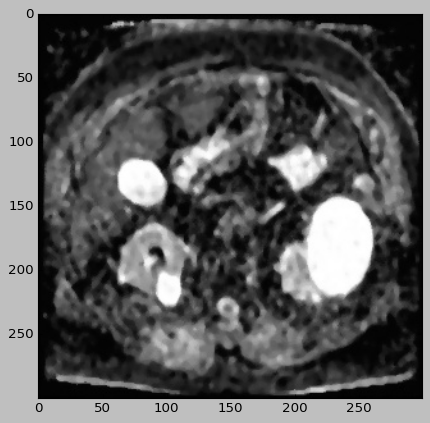

In [53]:
n=7
image= X_test[n]
plt.imshow(image)
input_img = np.expand_dims(image, axis=0)
print("prediction for this image is:", model.predict(input_img))
print("actual label for this image is ", y_test[n])

In [54]:
_,acc = model.evaluate(X_test, y_test)
print("Accuracy = ", (acc * 100.0), "%")

26/26 [==============================] - 11s 408ms/step - loss: 0.0346 - accuracy: 0.9901
Accuracy =  99.01356101036072 %


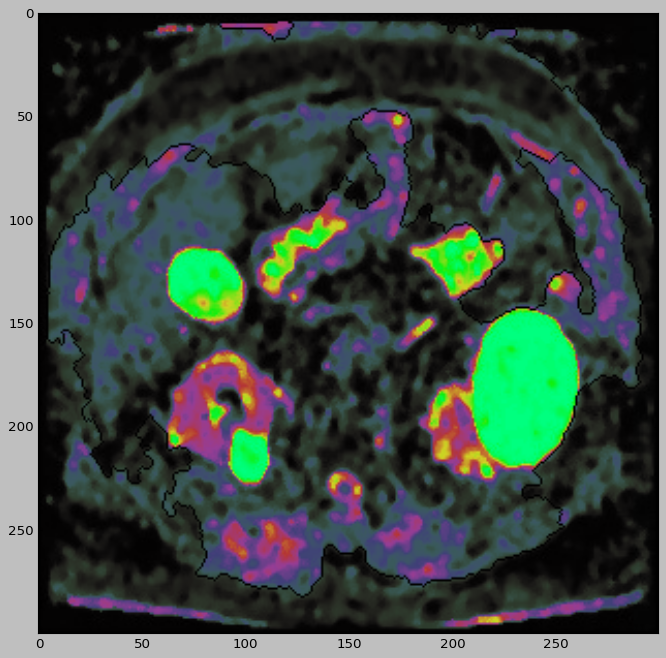

In [55]:
if  ( y_test[n]) == 1:
    
    #plt.imshow(image)
    cv2.imwrite("G:/hindy brain dataset/save/image.jpg", image)
    def ShowImage(title,img,ctype):
        plt.figure(figsize=(10, 10))
        if ctype=='bgr':
            b,g,r = cv2.split(img)      # get b,g,r
            rgb_img = cv2.merge([r,g,b])     # switch it to rgb
            plt.imshow(rgb_img)
        elif ctype=='hsv':
            rgb = cv2.cvtColor(img,cv2.COLOR_HSV2RGB)
            plt.imshow(rgb)
        elif ctype=='gray':
            plt.imshow(img,cmap='gray')
        elif ctype=='rgb':
            plt.imshow(img)
        else:
            raise Exception("Unknown colour type")
            plt.axis('off')
    #plt.title(title)
    plt.show()

    path = "G:/hindy brain dataset/save/image.jpg"
    #image_number= 1
    for file in glob.glob(path):
        #print(file)     #just stop here to see all file names printed
        img= cv2.imread(file)
        gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
        # noise removal
        kernel = np.ones((3,3),np.uint8)
        opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)
        # sure background area
        sure_bg = cv2.dilate(opening,kernel,iterations=3)
        # Finding sure foreground area
        dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
        ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)
        # Finding unknown region
        sure_fg = np.uint8(sure_fg)
        unknown = cv2.subtract(sure_bg,sure_fg)
        # Marker labelling
        ret, markers = cv2.connectedComponents(sure_fg)
        # Add one to all labels so that sure background is not 0, but 1
        markers = markers+1
        
        # Now, mark the region of unknown with zero
        markers[unknown==255] = 0
        markers = cv2.watershed(img,markers)
        img[markers == -1] = [255,0,0]
        im1 = cv2.cvtColor(img,cv2.COLOR_HSV2RGB)
        ShowImage('Watershed segmented image',im1,'gray')
    
   
else:
    win32ui.MessageBox("This case considers as a Benign ", "Result")

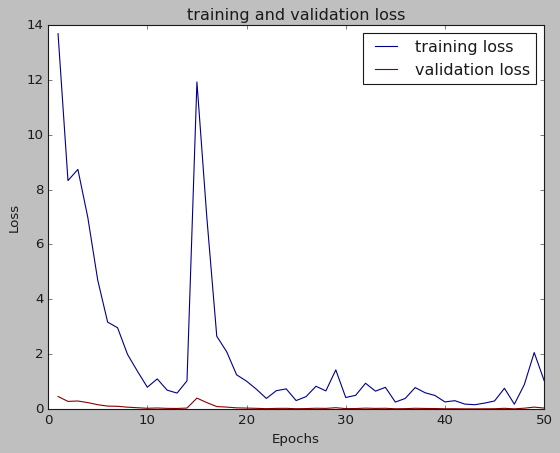

In [106]:
loss = [i * 30 for i in history.history['val_loss']]
validation_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'darkblue', label= 'training loss')
plt.plot(epochs, validation_loss, 'Darkred', label= 'validation loss')
plt.title('training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

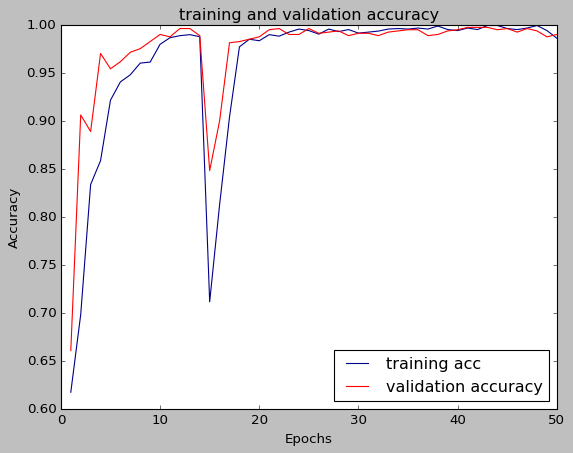

In [58]:
accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']
plt.plot(epochs, accuracy, 'darkblue', label='training acc')
plt.plot(epochs, validation_accuracy, 'r', label='validation accuracy')
plt.title('training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc="lower right")
plt.show()

In [200]:
#----------------------------threshold = 0.5--------------------------
mythreshold=0.5

y_pred= (model.predict(X_test)>= mythreshold).astype(int)
cm=confusion_matrix(y_test, y_pred)
print(cm)
plt.show()

[[273   5]
 [  3 530]]


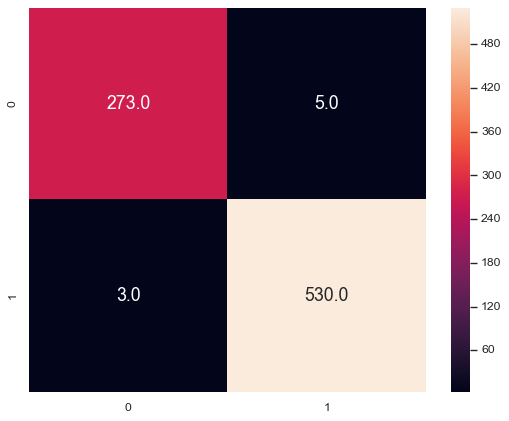

In [201]:
sn.set(font_scale=1) 
sn.heatmap(cm, annot=True,fmt=".1f", annot_kws={"size": 16}) 

plt.show()

In [202]:
TP=273
TN=530
FP=5
FN=3

In [203]:
ACC = (TP+TN)/(TP+FP+FN+TN)
print('Total Accuracy = ', ACC)

Total Accuracy =  0.9901356350184957


In [220]:
#----------------------------threshold = 0.0--------------------------
mythreshold=0.0

y_pred= (model.predict(X_test)>= mythreshold).astype(int)
cm=confusion_matrix(y_test, y_pred)
print(cm)
plt.show()

[[  0 278]
 [  0 533]]


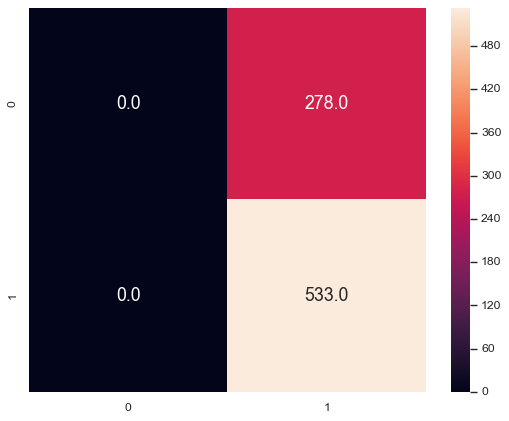

In [221]:
sn.set(font_scale=1) 
sn.heatmap(cm, annot=True,fmt=".1f", annot_kws={"size": 16}) 

plt.show()

In [222]:
TP=0
TN=533
FP=278
FN=0

In [229]:
ACC = (TP+TN)/(TP+FP+FN+TN)
print('Total Accuracy = ', ACC)

Total Accuracy =  0.657213316892725


In [208]:
#----------------------------threshold = 0.3--------------------------
mythreshold=0.3

y_pred= (model.predict(X_test)>= mythreshold).astype(int)
cm=confusion_matrix(y_test, y_pred)
print(cm)
plt.show()

[[273   5]
 [  3 530]]


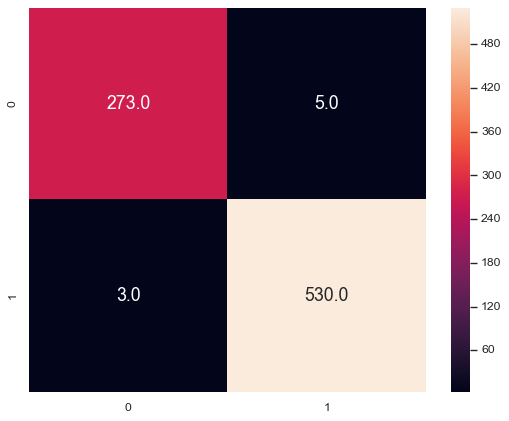

In [209]:
sn.set(font_scale=1) 
sn.heatmap(cm, annot=True,fmt=".1f", annot_kws={"size": 16}) 

plt.show()

In [231]:
TP=273
TN=530
FP=5
FN=3

In [232]:
ACC = (TP+TN)/(TP+FP+FN+TN)
print('Total Accuracy = ', ACC)

Total Accuracy =  0.9901356350184957


In [212]:
#----------------------------threshold = 0.7--------------------------
mythreshold=0.7

y_pred= (model.predict(X_test)>= mythreshold).astype(int)
cm=confusion_matrix(y_test, y_pred)
print(cm)
plt.show()

[[273   5]
 [  4 529]]


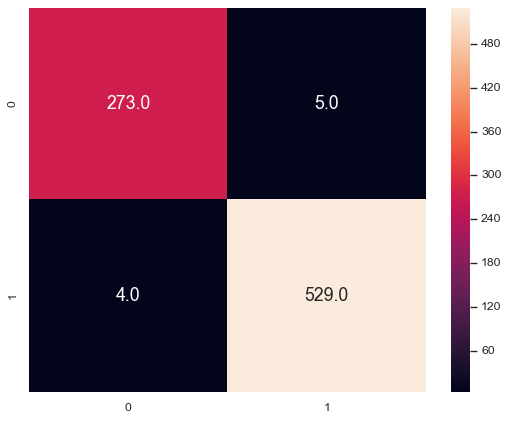

In [213]:
sn.set(font_scale=1) 
sn.heatmap(cm, annot=True,fmt=".1f", annot_kws={"size": 16}) 

plt.show()

In [233]:
TP=273
TN=529
FP=5
FN=4

In [234]:
ACC = (TP+TN)/(TP+FP+FN+TN)
print('Total Accuracy = ', ACC)

Total Accuracy =  0.9889025893958077


In [216]:
#----------------------------threshold = 1.0--------------------------
mythreshold=1.0

y_pred= (model.predict(X_test)>= mythreshold).astype(int)
cm=confusion_matrix(y_test, y_pred)
print(cm)
plt.show()

[[278   0]
 [ 98 435]]


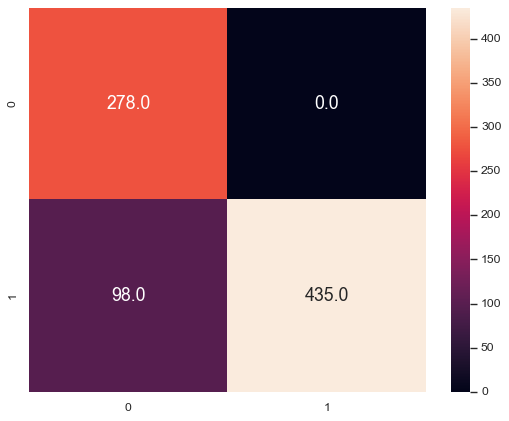

In [217]:
sn.set(font_scale=1) 
sn.heatmap(cm, annot=True,fmt=".1f", annot_kws={"size": 16}) 

plt.show()

In [235]:
TP=278
TN=435
FP=0
FN=98

In [236]:
ACC = (TP+TN)/(TP+FP+FN+TN)
print('Total Accuracy = ', ACC)

Total Accuracy =  0.8791615289765722


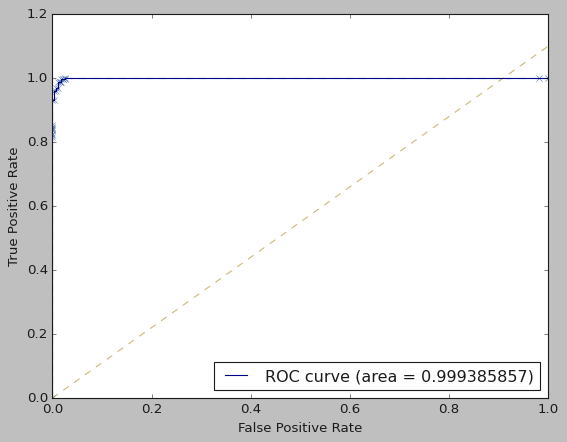

In [230]:
import sklearn.metrics as metrics
plt.style.use('classic')
from sklearn.metrics import roc_curve
y_preds = model.predict(X_test).ravel()
fpr, tpr, thersholds = roc_curve(y_test, y_preds)
plt.figure(1)
plt.plot([0, 1], [0, 1.1], 'y--')
plt.plot(fpr, tpr, 'x--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
curve_area= metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkblue',label='ROC curve (area = %0.9f)'  %curve_area)
plt.legend(loc="lower right")
plt.show()